# **Welcome to the Notebook**

### Let's mount the google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 : 
Installing pyspark module

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 44 kB/s 
     |████████████████████████████████| 199 kB 44.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=d742ea0c8219489978837928b78237d6b8947114b06f85a7a2c5b57e42a88adf
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


Importing the modules 

In [64]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max ,struct
import matplotlib.pyplot as plts

creating spark session

In [ ]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

In [ ]:
spark

# Task 2 : 
importing the *Listenings.csv* file: 

In [ ]:
# listening_csv_path = spark.read.csv('/content/drive/MyDrive/dataset/listenings.csv')
listening_df = spark.read.option('header',True).csv('/content/drive/MyDrive/dataset/listenings.csv')

let's check the data:

In [ ]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

let's delete useless columns:

In [ ]:
listening_df = listening_df.drop('date')

drop the null rows:

In [ ]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [ ]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema: 

In [ ]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe: 

In [ ]:
shape = (listening_df.count(),len(listening_df.columns))
print(shape)

(13758905, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
q0 = listening_df.select('artist','track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [32]:
q1 =listening_df.select('user_id').filter(listening_df.artist == 'Rihanna')
q1.show()

+-----------+
|    user_id|
+-----------+
|000Silenced|
|000Silenced|
|00williamsl|
|00williamsl|
|00williamsl|
|00williamsl|
|00williamsl|
|    0502008|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
|      0rdos|
+-----------+
only showing top 20 rows



**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [33]:
q2 = listening_df.select('user_id').filter(listening_df.artist=='Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks 

In [36]:
q3 = listening_df.select('artist','track').groupBy('artist','track').agg(count('track').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [39]:
q4 = listening_df.select('artist','track').filter(listening_df.artist=='Rihanna').groupBy('track').agg(count('track').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+--------------------+-----+
|               track|count|
+--------------------+-----+
|                Work| 2646|
|Only Girl (In the...| 1749|
|We Found Love (fe...| 1575|
|                 S&M| 1307|
|            Rude Boy| 1303|
|            Diamonds| 1224|
|      Kiss it Better|  945|
| Where Have You Been|  844|
|Cheers (Drink to ...|  697|
|           Desperado|  679|
+--------------------+-----+



**Query #5:**

find top 10 famous albums 

In [41]:
q5= listening_df.select('album').groupBy('album').agg(count('album').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+-----+
|               album|count|
+--------------------+-----+
|       Greatest Hits|67892|
|   The Life Of Pablo|22311|
|                  AM|14264|
|                  xx|14198|
|     An Awesome Wave|13673|
|        Sigh No More|13556|
|Whatever People S...|12731|
|            For Emma|11995|
|          Art Angels|11694|
|                  21|11576|
+--------------------+-----+



In [42]:
q5= listening_df.select('artist','album').groupBy('artist','album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



In [40]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

# Task 4 :
importing the ***genre.csv*** file:

In [43]:
genre_df = spark.read.option('header',True).csv('/content/drive/MyDrive/dataset/genre.csv')


let's check the data

In [45]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

In [44]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

In [46]:
data = listening_df.join(genre_df,how='inner',on='artist')
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [48]:
q6 = data.select('user_id','genre').filter(data.genre=='pop').groupBy('user_id','genre').agg(count('genre').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+-----+
|        user_id|genre|count|
+---------------+-----+-----+
|        01Green|  pop|  496|
|          mrpsb|  pop|  400|
|      momousagi|  pop|  400|
|   BlueKnockOut|  pop|  378|
|    musicboy80s|  pop|  376|
|  incultojurgis|  pop|  374|
| ElektricOrchid|  pop|  370|
|foreign_fanatic|  pop|  350|
|   Kevin_Soutar|  pop|  346|
|  landrover2171|  pop|  301|
+---------------+-----+-----+



**Query #7**

find top 10 famous genres

In [60]:
q7= data.select('genre').groupBy('genre').agg(count('genre').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [63]:
q8_1 = data.select('user_id','genre').groupBy('user_id','genre').agg(count('*').alias('count')).orderBy('user_id')
q8_1.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph| Boston Pops Orch...|    1|
| --Seph|                 pop|    9|
| --Seph|          Nils Frahm|    1|
| --Seph|               dance|    1|
| --Seph|  progressive trance|    1|
| --Seph|          Thom Yorke|    2|
| --Seph|               Ruben|    4|
| --Seph|           classical|   31|
| --Seph|               indie|    3|
| --Seph|         heavy metal|    1|
| --Seph|                punk|    3|
| --Seph|           anti-folk|    3|
| --Seph|               house|    3|
| --Seph|              Xzibit|    4|
| --Seph|          electropop|    1|
| --Seph| Orchestra of Wel...|    1|
| --Seph|   Alesso Feat Hurts|    1|
| --Seph|       Sara Mingardo|    1|
| --Seph| Sir Colin Davis ...|    1|
| --Seph|          indie rock|   15|
+-------+--------------------+-----+
only showing top 20 rows



In [68]:
q8_2= q8_1.groupBy('user_id').agg(max(struct(col('count'),col('genre'))).alias('max')).select(col('user_id'),col('max.genre'))
q8_2.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [72]:
q9 = genre_df.select('genre').filter((genre_df.genre=='pop')|(genre_df.genre=='rock')|(genre_df.genre=='metal')|(genre_df.genre=='hip hop')).groupBy('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [77]:
q9_list=q9.collect()

In [80]:
labels = [row['genre'] for row in q9_list]
count = [row['count'] for row in q9_list]


In [82]:
count

[6960, 4288, 1854, 9066]

now lets visualize these two lists using a bar chart

Text(0.5, 0, 'Genre')

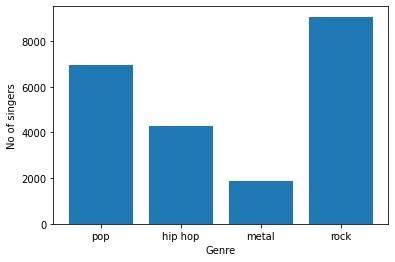

In [84]:
plts.bar(labels,count)
plts.ylabel('No of singers')
plts.xlabel('Genre')